# Assignment 2

Name: Preet Sojitra

Roll No: 21BCP388

Semester: 6, Div: 6

Outpus of some code cells are cleared intentionally to reduce the size of the file.

## 1. Histogram Equalization

Write a program (do not use built in functions) to perform image enhancement using
histogram equalization method on the images given in the folder Assignment
2/equil’

In [11]:
# Importing the required libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
equli_images_path = 'images/equil'

In [16]:
im = Image.open(f"{equli_images_path}/img2.jpg")
try:
    # Trying to open the image
    im.show()
except:
    pass

In [17]:
im.size # image is already in grayscale

(256, 256)

In [18]:
# converting the image to grayscale
im = im.convert('L')

In [20]:
im = np.asarray(im)
im.shape

(256, 256)

In [ ]:
im

In [22]:
# Histogram equalization

# step-1: creating dictionary of pixel values and their counts
pixel_values = {}

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if im[i][j] in pixel_values:
            pixel_values[im[i][j]] += 1
        else:
            pixel_values[im[i][j]] = 1

In [23]:
len(pixel_values)

51

In [ ]:
# sorting the dictionary
pixel_values = dict(sorted(pixel_values.items()))
pixel_values

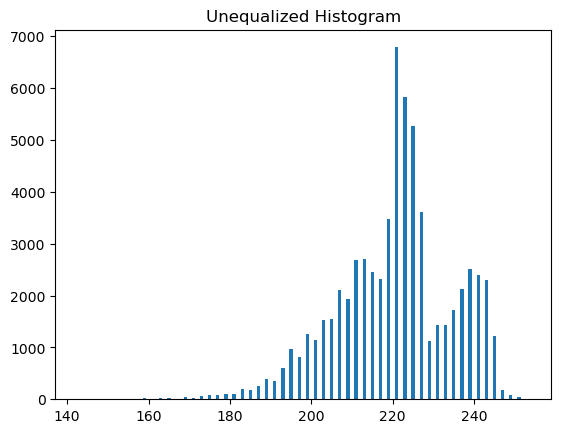

In [25]:
# unequalized histogram
plt.bar(pixel_values.keys(), pixel_values.values())
plt.title('Unequalized Histogram')
plt.show()

In [ ]:
# we going to perform histogram equalization on the image

# step-2: calculating the probability of each pixel value .i.e. p(rk) or simply p(k) also called as PDF (probability density function)
# p(k) = n(k) / N where n(k) is the count of pixel value k and N is the total number of pixels in the image

total_pixels = im.shape[0] * im.shape[1]
pdf = {}

for key in pixel_values:
    pdf[key] = np.round(pixel_values[key] / total_pixels, 4)

pdf

In [27]:
# step-3: calculating the cumulative distribution function (CDF) of the pixel values
# CDF(k) = sum(p(i)) where i = 0 to k

cdf = {}
equ_hist = {}

# each cdf value is the sum of current pdf + previous cdf value

for i, key in enumerate(pdf):
    # if it is the first value
    if i == 0:
        cdf[key] = pdf[key]
    else:
        # this is taking the previous cdf value and adding the current pdf value
        cdf[key] = cdf[list(cdf.keys())[i-1]] + pdf[key]

In [ ]:
for key in cdf:
    equ_hist[key] = round(cdf[key] * 255) # since the pixel values are in the range of 0-255. So, we multiply the cdf value with 255

equ_hist

In [29]:
# step-4: creating the equalized image
equ_im = np.zeros(im.shape)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        equ_im[i][j] = equ_hist[im[i][j]]

In [ ]:
plt.imshow(equ_im, cmap='gray')
plt.show()

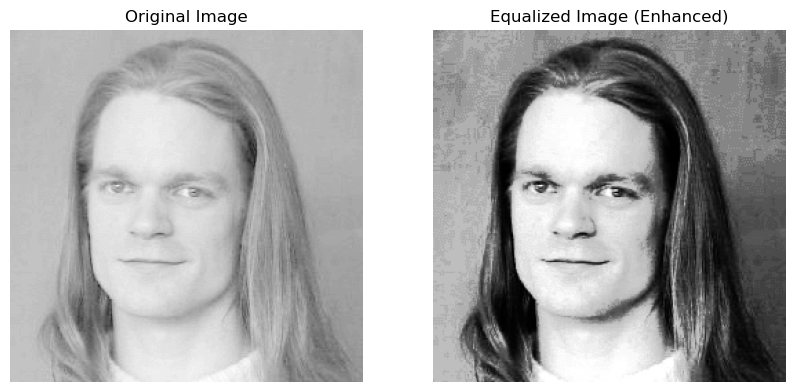

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(equ_im, cmap='gray')
plt.title('Equalized Image (Enhanced)')
plt.axis("off")
plt.show()


Converting whole code into a function and then calling it for each image in the folder.

In [32]:
# creating two functions, one for calculating the histogram and then one for equalizing the histogram

def calcHist(image):
    """Calculates the histogram of the image. Works only for grayscale images

    Args:
        image (PIL.Image): The input image

    Returns:
        dict: The histogram values
    """
    # first converting image to grayscale
    im = image.convert('L')
    # converting the image to numpy array
    im = np.asarray(im)
    
    hist_values = {}
    
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] in hist_values:
                hist_values[im[i][j]] += 1
            else:
                hist_values[im[i][j]] = 1
                
    hist_values = dict(sorted(hist_values.items())) 
    return hist_values

def equHist(image, hist_values):
    """Equalizes the histogram of the image. Works only for grayscale images

    Args:
        image (_type_): Input image
        hist_values (dict): The histogram values of the image

    Returns:
        (numpy.ndarray, dict): The equalized image and the equalized histogram values (pixel values and their counts)
    """
    
    im = image.convert('L')
    im = np.asarray(im)
    
    total_pixels = im.shape[0] * im.shape[1]
    pdf = {}
    cdf = {}
    equ_hist = {}
    
    for key in hist_values:
        pdf[key] = np.round(hist_values[key] / total_pixels, 4)
    
    for i, key in enumerate(pdf):
        if i == 0:
            cdf[key] = pdf[key]
        else:
            # this is taking the previous cdf value and adding the current pdf value
            cdf[key] = cdf[list(cdf.keys())[i-1]] + pdf[key]
    
    for key in cdf:
        equ_hist[key] = round(cdf[key] * 255) # since the pixel values are in the range of 0-255. So, we multiply the cdf value with 255
    
    equ_im = np.zeros(im.shape)
    
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            equ_im[i][j] = equ_hist[im[i][j]]
            
    return equ_im, equ_hist, cdf

def compareHist(hist1, hist2, cdf):
    """Compares the original histogram and the equalized histogram

    Args:
        hist1 (dict): The original histogram
        hist2 (dict): The equalized histogram
        cdf (dict): The cumulative distribution function
    """
    plt.subplots(1, 3, figsize=(15, 5))
    plt.subplot(131)
    plt.bar(hist1.keys(), hist1.values())
    plt.title('Original Histogram')
    plt.subplot(132)
    plt.plot(list(cdf.keys()), list(cdf.values()), color='r')
    plt.title('CDF')
    plt.subplot(133)
    plt.bar(hist2.keys(), hist2.values())
    plt.title('Equalized Histogram')
    plt.show()
    
def compareImages(im1, im2):
    """Compares the original image and the equalized image

    Args:
        im1 (PIl.Image or numpy.ndarray): The original image
        im2 (PIl.Image or numpy.ndarray): The equalized image
    """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(im1, cmap='gray')
    plt.title('Original Image')
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(im2, cmap='gray')
    plt.title('Equalized Image (Enhanced)')
    plt.axis("off")
    plt.show()

In [33]:
im = Image.open(f"{equli_images_path}/img3.jpg")
hist_values = calcHist(im)
equ_im, equ_hist, cdf = equHist(im, hist_values)

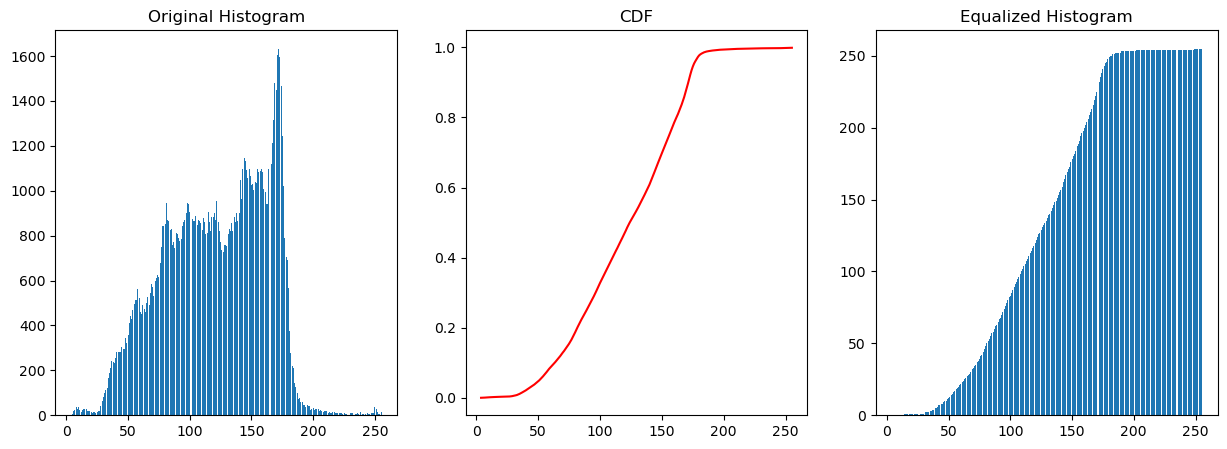

In [34]:
compareHist(hist_values, equ_hist, cdf)

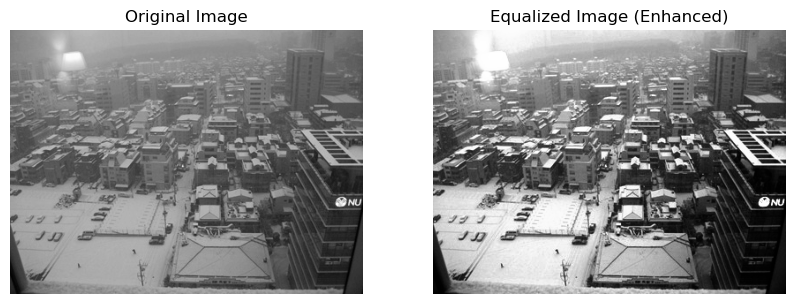

In [35]:
compareImages(im, equ_im)

In [ ]:
# applying the histogram equalization on all the remaining images in the folder

images_list = ["img4.tif", "img5.tif", "img6.tif"]

In [ ]:
all_images = [Image.open(f"{equli_images_path}/{img}") for img in images_list]

images_hist = [calcHist(im) for im in all_images]
equ_images = [equHist(im, hist) for im, hist in zip(all_images, images_hist)]


In [ ]:
# plotting the original and equalized images
for i in range(len(all_images)):
    compareImages(np.array(all_images[i]), equ_images[i][0])

Some images are not enhanced as expected, because the the image are not in grayscale format.

In [ ]:
im = Image.open(f"{equli_images_path}/img6.tif")
im.mode

In [ ]:
# plotting the original and equalized histograms
for i in range(len(all_images)):
    compareHist(images_hist[i], equ_images[i][1], equ_images[i][2])

## 2. Histogram Matching/Specification

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [37]:
image_path = "images/specfi"

In [38]:
def _find_nearest_above(tmpl_rounded, target):
    """Finds the nearest value in the tmpl_rounded array which is greater than the target value. This is used for histogram matching.

    Args:
        tmpl_rounded (ndarray): The rounded values of the cumulative distribution function of the template image
        target (int): The target pixel value from the source image

    Returns:
        int: The index of the nearest value of the pixel value in the tmpl_rounded array
    """
    # target is that value of pixel whose index is to be found in the tmpl_rounded
    diff = tmpl_rounded - target

    '''
    Creating a mask of the difference array. If the difference is less than or equal to -1, then the mask value will be True, else False. 
    Here's how the mask will look like:
    mask = [True, True, True, True, False,...]
    '''
    mask = np.ma.less_equal(diff, -1)
    
    '''
    np.all() returns True if all the values in the mask are True, else False. If all the values are True, then it means that all the values in the tmpl_rounded array are less than the target value. In this case, we will return the index of the nearest value in the tmpl_rounded array. 
    
    There will be one value whose difference will be less than 0. We will find that value and return its index. Since all are in negative. So we will convert the negative values to positive and then find the index of the minimum value.
    
    For eg let's assume:
    tmpl_rounded = [7, 11, 15, 18, 20]
    target = 23
    diff = [-16, -12, -8, -5, -3]
    We need to choose the value which is closest to the target value i.e., value having the minimum difference with the target value
    '''
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c

    # If the mask is not all True, then are are some values in the tmpl_rounded array which are greater than the target value. We will find the index of the nearest value in the tmpl_rounded array.
    masked_diff = np.ma.masked_array(diff, mask) # this is remove the negative values from the diff array. 
    
    # since negative values are removed, we will return first index of the masked_diff array. This will be the index of the nearest value in the tmpl_rounded array.
    return masked_diff.argmin()

def _match_cumulative_cdf(source, template):
    """This function matches the cumulative distribution function of the source and template images. This is used for histogram matching.

    Args:
        source (ndarray): The source image
        template (ndarray): The reference or template image

    Returns:
        ndarray: The matched image with the same shape as the source image for single channel
        tuple: The source unique intensity values, their counts and the normalized quantiles
        tuple: The template unique intensity values, their counts and the normalized quantiles
    """
    src_values, src_lookup, src_counts = np.unique(source.reshape(-1), return_inverse=True, return_counts=True)
    tmpl_values, tmpl_counts = np.unique(template.reshape(-1), return_counts=True)
    
    # calculating the normalized quantiles for each each array
    src_quantiles = np.cumsum(src_counts) / source.size
    tmpl_quantiles = np.cumsum(tmpl_counts) / template.size
    
    '''
    Rounding the quantiles to the nearest integer. Since the pixel values are in the range of 0-255, we will multiply the quantiles with 255 and then round them to the nearest integer.
    '''
    src_rounded = np.around(src_quantiles * 255)
    tmpl_rounded = np.around(tmpl_quantiles * 255)
    
    # now mapping the values for each pixel in the source image. It is mapped to the nearest pixel intensity value based on the template image
    mapped_values = []
    for data in src_rounded:
        mapped_values.append(_find_nearest_above(tmpl_rounded, data))

    mapped_values = np.array(mapped_values, dtype="uint8")
    
    # reconstructing the image from the mapped values. The shape of the source image is preserved
    return mapped_values[src_lookup].reshape(source.shape), (src_values, src_counts, src_quantiles), (tmpl_values, tmpl_counts, tmpl_quantiles)

def matchHistogram(image, reference, channel_axis=None):
    """Matches the histogram of the image to the reference image. Works for both grayscale and color images. Matching is done for each channel seperately.

    Args:
        image (PIL.Image): The input image
        reference (PIL.Image): The reference image
        channel_axis (int, optional): If None, the image is assumed to be grayscale. Otherwise, this parameter indicates the axis of the color channel. Defaults to None.

    Raises:
        ValueError: Thrown when the number of channels in the image and reference are not same

    Returns:
        ndarray: The matched image
        tuple: The source cumulative distribution function and the source histogram
        tuple: The reference cumulative distribution function and the reference histogram
    """
    # convert image to numpy array
    image = np.asarray(image)
    reference = np.asarray(reference)
    
    
    if image.ndim != reference.ndim:
        raise ValueError(f"Both the images should have same number of channels. Image has {image.ndim} channels and reference has {reference.ndim} channels")
    
    if channel_axis is not None:
        
        source_cdf = {
            "R": None,
            "G": None,
            "B": None
        }
        source_hist = {
            "R": None,
            "G": None,
            "B": None
        }
        
        reference_cdf = {
            "R": None,
            "G": None,
            "B": None
        }
        
        reference_hist = {
            "R": None,
            "G": None,
            "B": None   
        }
        
        if image.shape[channel_axis] != reference.shape[channel_axis]:
            raise ValueError(f"The number of channels in the image and reference should be same. Image has {image.shape[channel_axis]} channels and reference has {reference.shape[channel_axis]} channels")
        
        matched = np.zeros_like(image)
        
        for channel in range(image.shape[-1]):
            matched_channel, source, template = _match_cumulative_cdf(image[..., channel], reference[..., channel]) # this is slicing the image and reference along the channel axis
            matched[..., channel] = matched_channel
            
            # unpacking the source and template values and storing them in the respective dictionaries and setting the histograms
            src_values, src_counts, src_quantiles = source
            tmpl_values, tmpl_counts, tmpl_quantiles = template
            if channel == 0:
                source_cdf["R"] = src_quantiles
                reference_cdf["R"] = tmpl_quantiles
                
                zip_source = zip(src_values, src_counts)
                source_hist["R"] = dict(zip_source)
                
                zip_template = zip(tmpl_values, tmpl_counts)
                reference_hist["R"] = dict(zip_template)
            elif channel == 1:
                source_cdf["G"] = src_quantiles
                reference_cdf["G"] = tmpl_quantiles
                
                zip_source = zip(src_values, src_counts)
                source_hist["G"] = dict(zip_source)
                
                zip_template = zip(tmpl_values, tmpl_counts)
                reference_hist["G"] = dict(zip_template)
                
            else:
                source_cdf["B"] = src_quantiles
                reference_cdf["B"] = tmpl_quantiles
                
                zip_source = zip(src_values, src_counts)
                source_hist["B"] = dict(zip_source)
                
                zip_template = zip(tmpl_values, tmpl_counts)
                reference_hist["B"] = dict(zip_template)
        
        return matched, (source_cdf, source_hist), (reference_cdf, reference_hist)
    else:
        matched, source, template = _match_cumulative_cdf(image, reference)
        
        src_values, src_counts, source_cdf = source
        tmpl_values, tmpl_counts, reference_cdf = template
        
        zip_source = zip(src_values, src_counts)
        source_hist = dict(zip_source)
        
        zip_template = zip(tmpl_values, tmpl_counts)
        reference_hist = dict(zip_template)
        
        return matched, (source_cdf, source_hist), (reference_cdf, reference_hist)


In [39]:
def plotImages(source, reference, output):
    """Plots the input, reference and output images

    Args:
        source (ndarray): The input image
        reference (ndarray): The reference image
        output (ndarray): The output image
    """
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(source, cmap='gray')
    plt.title('Input Image')
    plt.axis("off")
    plt.subplot(132)
    plt.imshow(reference, cmap='gray')
    plt.title('Reference Image')
    plt.axis("off")
    plt.subplot(133)
    plt.imshow(output, cmap='gray')
    plt.title('Output Image')
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    
def plotRGBHistogram(hist_values, plot_title="Histogram"):
    """Plots the RGB histograms

    Args:
        hist_values (dict): The histogram values
    """
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.bar(hist_values["R"].keys(), hist_values["R"].values(), color='r')
    plt.title('Red Channel Histogram')
    plt.subplot(132)
    plt.bar(hist_values["G"].keys(), hist_values["G"].values(), color='g')
    plt.title('Green Channel Histogram')
    plt.subplot(133)
    plt.bar(hist_values["B"].keys(), hist_values["B"].values(), color='b')
    plt.title('Blue Channel Histogram')
    plt.suptitle(plot_title)
    plt.show()
    
def plotCDF(cdf_values, plot_title="CDF"):
    """Plots the CDF values

    Args:
        cdf_values (dict): The CDF values
    """
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.plot(cdf_values["R"], color='r')
    plt.title('Red Channel CDF')
    plt.subplot(132)
    plt.plot(cdf_values["G"], color='g')
    plt.title('Green Channel CDF')
    plt.subplot(133)
    plt.plot(cdf_values["B"], color='b')
    plt.title('Blue Channel CDF')
    plt.suptitle(plot_title)
    plt.show()

In [40]:
im1 = Image.open(f"{image_path}/input_img1.jpg")
ref1 = Image.open(f"{image_path}/lena_ref1.jpg")

In [41]:
new_img, source_stats, ref_stats = matchHistogram(im1.convert("RGB"), ref1, channel_axis=2)

In [42]:
source_cdf, source_hist = source_stats
ref_cdf, ref_hist = ref_stats

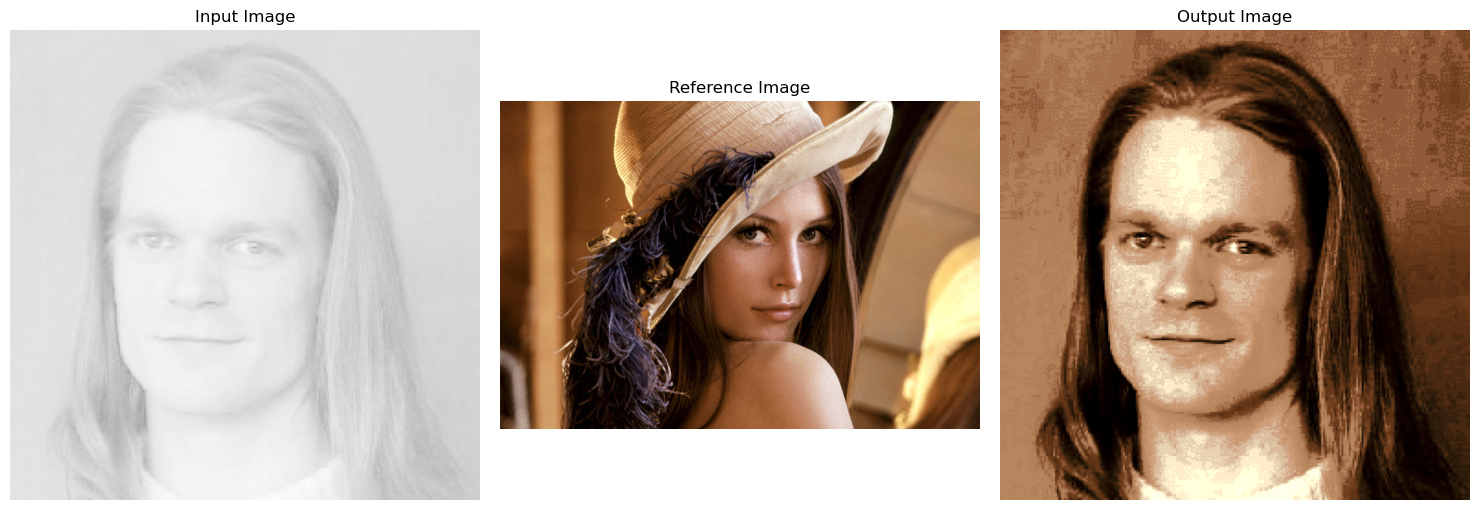

In [43]:
plotImages(im1, ref1, new_img)

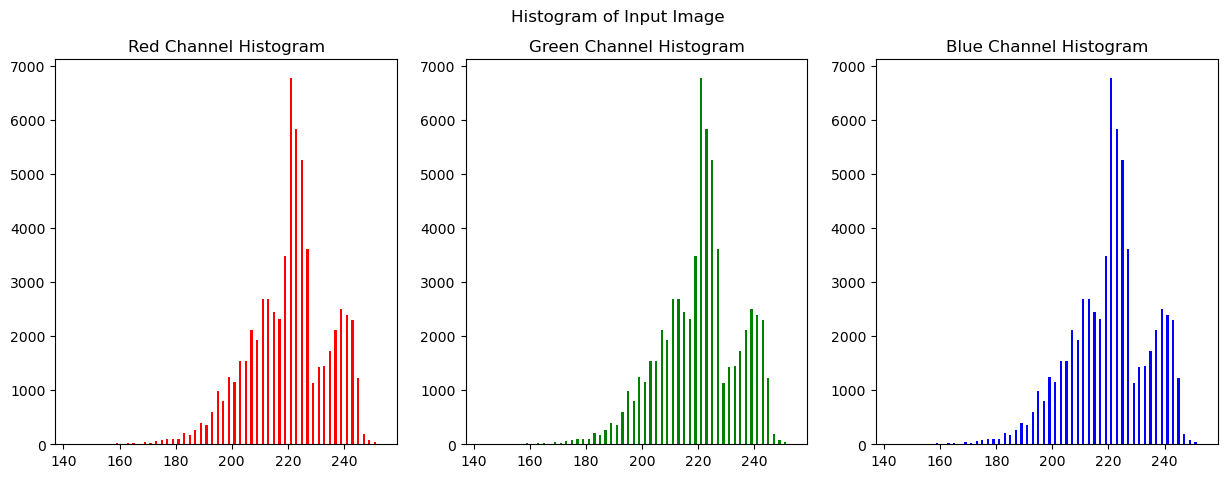

In [44]:
# plotting the histogram of source and reference images
plotRGBHistogram(source_hist, plot_title="Histogram of Input Image")

In [ ]:
plotRGBHistogram(ref_hist, plot_title="Histogram of Reference Image")

In [ ]:
plotCDF(source_cdf, plot_title="CDF of Input Image")

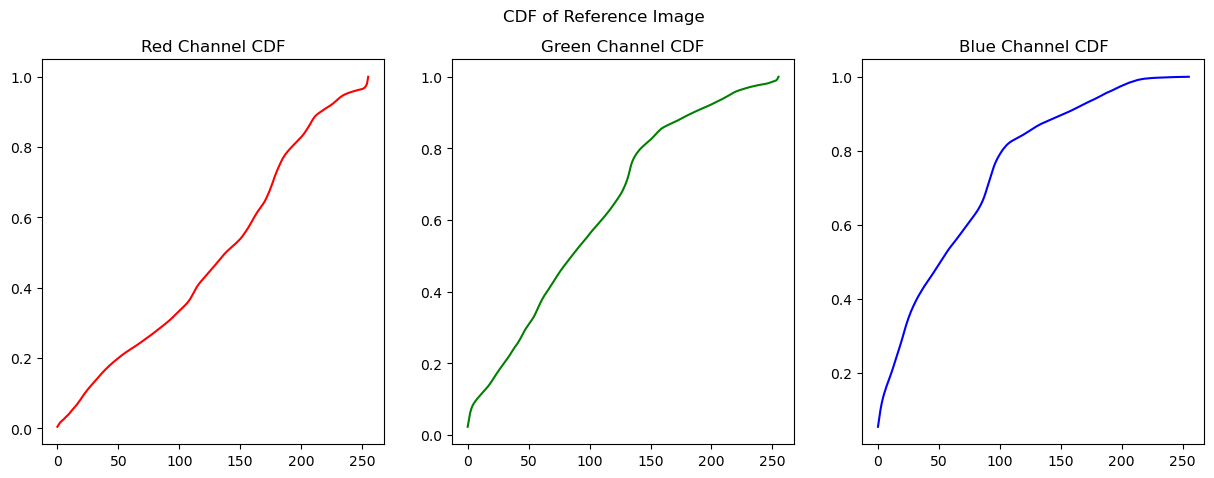

In [45]:
plotCDF(ref_cdf, plot_title="CDF of Reference Image")

Similarly, plots can be plotted for rest of the the images.

In [49]:
# applying the histogram matching on all the remaining images in the folder

# All images 👇
# input_images = ["input_img2.png", "input_img3.png", "input_img4.png", "input_img5.png"]
# reference_images = ["lena_ref1.jpg", "refer_img2.png"]

# For reducing the size of the ipynb file, I will only apply the histogram matching on few images
input_images = ["input_img3.png","input_img5.png"]
reference_images = ["lena_ref1.jpg",]

original_images = [Image.open(f"{image_path}/{img}") for img in input_images]
reference_images = [Image.open(f"{image_path}/{img}") for img in reference_images]

matched_images = []

# for each input image, we will match the histogram with each reference image
for img in original_images:
    for ref in reference_images:
        matched_image, _, _ = matchHistogram(img.convert("RGB"), ref, channel_axis=-1)
        matched_images.append(matched_image)

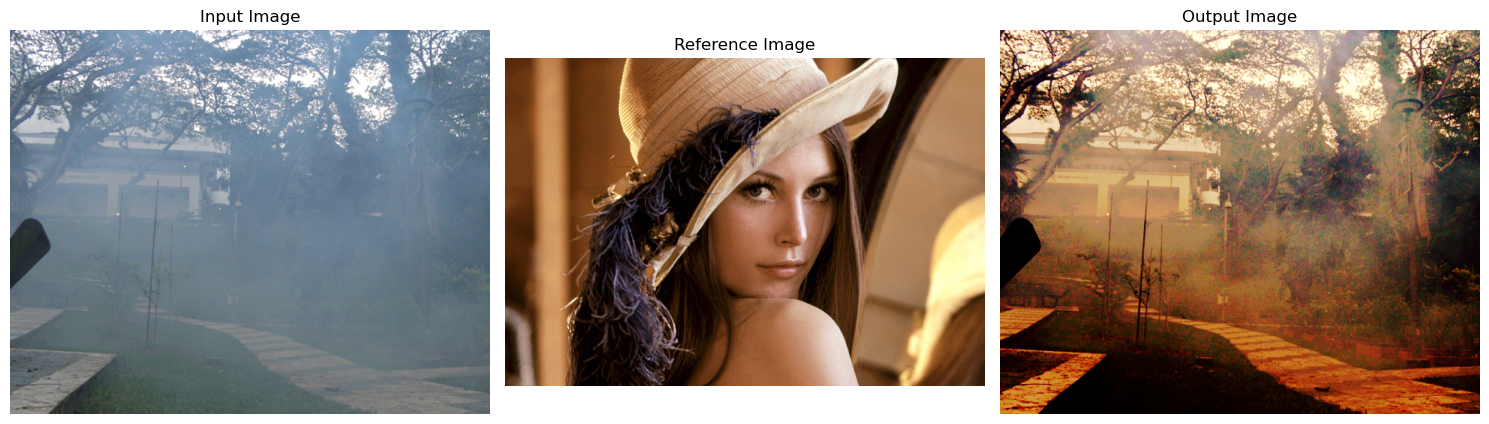

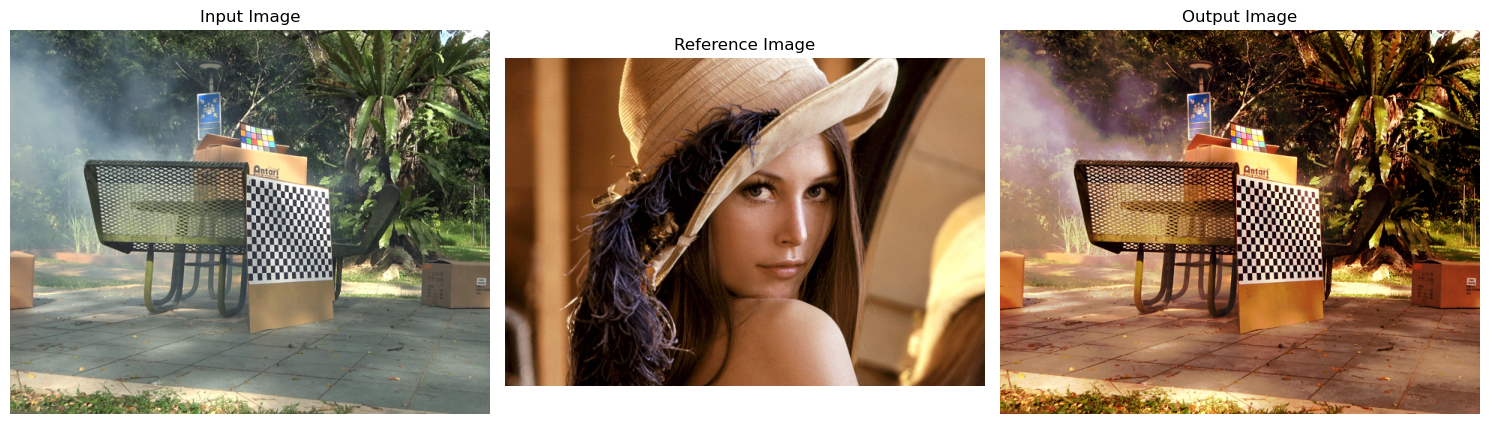

In [50]:
for i in range(len(matched_images)):
    # Uncomment below line if you are using all the images from the folder
    # plotImages(original_images[i // 2], reference_images[i % 2], matched_images[i])
    
    plotImages(original_images[i], reference_images[0], matched_images[i])

#### References:

1. Source code of the skimage histogram matching function has been referred for the implementation of the histogram matching function.